In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np

import pandas as pd

In [5]:
data=pd.read_csv("/content/Complete_merged.csv",header=0,encoding='ISO-8859–1')
data.head()

,location,text,hashtags
0,NaN,russian artillery entered a battle with McDona...,[]
1,Delhi,Shades of grey #War #MausMusings #Kharkiv #Ukr...,"['War', 'MausMusings', 'Kharkiv', 'Ukraine']"
2,NaN,1.) You are embedded with the âKrakenâ win...,[]
3,NaN,"In Kharkiv, after shelling in Saltivka, two hi...",[]
4,Newyork,The activities carried out by the United State...,"['ETH', 'France', 'BSC']"


In [6]:
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, str(input_txt))
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")

     
    return tweets

In [7]:
import string
# import nltk
# from nltk.corpus import stopwords
# nltk.download("stopwords")
# stop_words = set(stopwords.words("english"))
# stemmer = nltk.SnowballStemmer("english")




#converted tweets to lower case
data['preprocess_data'] = data['text'].str.lower()

#url removed
data['preprocess_data'] = data['preprocess_data'].str.replace(r'(https|http)?:\/(\w|\.|\/|\?|\=|\&|\%)*\b','')
data['preprocess_data'] = data['preprocess_data'].str.replace(r'www\.\S+\.com','')

#removed retweets & cc
data['preprocess_data'] = data['preprocess_data'].str.replace(r'rt|cc', '')

#hashtags removed
data['preprocess_data'] = data['preprocess_data'].str.replace(r'#\S+', '')

#user mentioned removed
data['preprocess_data'] = data['preprocess_data'].str.replace(r'@\S+', '')

#emoji removed
data['preprocess_data'] = data['preprocess_data'].str.replace(r'[^\x00-\x7F]+', '')

#html tags
data['preprocess_data'] = data['preprocess_data'].str.replace(r'<.*?>', '')

#removed extra spaces
data['preprocess_data'] = data['preprocess_data'].str.replace(r' +', ' ')

#punctuation replaced
data['preprocess_data'] = data['preprocess_data'].str.replace('[{}]'.format(string.punctuation), '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: The default value of regex will change from True to Fals

In [8]:
data.head()

,location,text,hashtags,preprocess_data
0,NaN,russian artillery entered a battle with McDona...,[],russian aillery entered a battle with mcdonald...
1,Delhi,Shades of grey #War #MausMusings #Kharkiv #Ukr...,"['War', 'MausMusings', 'Kharkiv', 'Ukraine']",shades of grey
2,NaN,1.) You are embedded with the âKrakenâ win...,[],1 you are embedded with the kraken wing of azo...
3,NaN,"In Kharkiv, after shelling in Saltivka, two hi...",[],in kharkiv after shelling in saltivka two high...
4,Newyork,The activities carried out by the United State...,"['ETH', 'France', 'BSC']",the activities carried out by the united state...


In [15]:
!pip install -U spacy

     |████████████████████████████████| 6.2 MB 4.4 MB/s 
     |████████████████████████████████| 653 kB 47.3 MB/s 
     |████████████████████████████████| 10.1 MB 33.9 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 457 kB 48.3 MB/s 
     |████████████████████████████████| 181 kB 50.7 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
    U

In [16]:
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 5.3 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
import spacy

# spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm")

In [20]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent_pre=data['preprocess_data'].\
    apply(lambda x : ner(x))
ent_pre=[x for sub in ent_pre for x in sub]

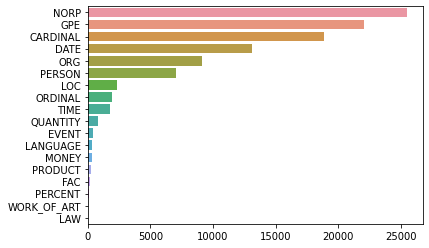

In [21]:
from collections import Counter
import seaborn as sns

counter=Counter(ent_pre)
count=counter.most_common()

x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


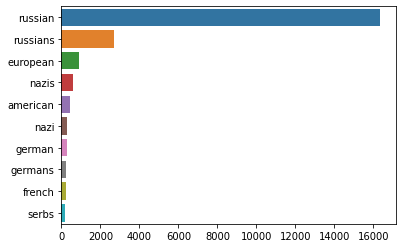

In [22]:
def ner_nor(text,ent="NORP"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

norp=data['preprocess_data'].apply(lambda x: ner_nor(x))
norp=[i for x in norp for i in x]
counter_nor =Counter(norp)

x,y=map(list,zip(*counter_nor.most_common(10)))
sns.barplot(y,x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


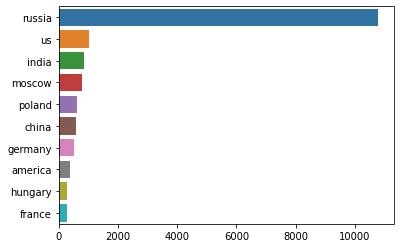

In [23]:
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=data['preprocess_data'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter4 =Counter(gpe)

x,y=map(list,zip(*counter4.most_common(10)))
sns.barplot(y,x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


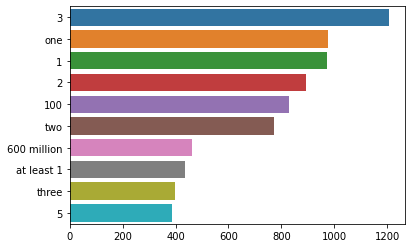

In [25]:
def ner(text,ent="CARDINAL"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe=data['preprocess_data'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]
counter4 =Counter(gpe)

x,y=map(list,zip(*counter4.most_common(10)))
sns.barplot(y,x)